In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

from model import Model
from losses.binarycrossentropy import BinaryCrossEntropy
from optimizers.gradientdescent import GD
from optimizers.adam import Adam
from activations import Sigmoid, ReLU, LinearActivation, Tanh
from layers.fullyconnected import FC
from layers.convolution2d import Conv2D
from layers.maxpooling2d import MaxPool2D

# Define directories and files for training data

In [2]:

DIR2, DIR5 = ["./datasets/MNIST/" + number + "/" for number in ["2", "5"]]
FILES2, FILES5 = [
    [dir + image_name for image_name in os.listdir(dir)] for dir in [DIR2, DIR5]
]


def load_image_data(path, label):
    """
    Load image data from file path with corresponding label
    """
    return (np.expand_dims(np.array(Image.open(path)) / 255.0, axis=-1), label)


# Load and preprocess training data
data = []
for dataset, label in [(FILES2, 0), (FILES5, 1)]:
    data += [load_image_data(image, label) for image in dataset]


# Define neural network architecture

In [3]:
# this model is more complicated and needs more epochs to fit

# arch_model = {
#     "CONV1": Conv2D(1, 2, name="CONV1", kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#     "RELU1": ReLU(),
#     "MAXPOOL1": MaxPool2D(kernel_size=(2, 2), stride=(2, 2)),
#     "LINEAR1": LinearActivation(),
    
#     "CONV2": Conv2D(2, 4, name="CONV2", kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#     "SIGMOMID1": Sigmoid(),
#     "MAXPOOL2": MaxPool2D(kernel_size=(4, 4), stride=(4, 4)),
#     "LINEAR2": LinearActivation(),
    
#     # "CONV3": Conv2D(4, 8, name="CONV3", kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#     # "THANH1": Tanh(),
#     # # 
#     # # "FC1": FC(49 * 8, 16, "FC1"),
#     # # "ReLU2": ReLU(),
#     # # or
#     # "MAXPOOL3": MaxPool2D(kernel_size=(2, 2), stride=(2, 2)),
#     # "LINEAR3": LinearActivation(),
    
#     "FC1": FC(9 * 4, 16, "FC1"),
#     "ReLU2": ReLU(),
#     # 
#     "FC2": FC(16, 1, "FC2"),
#     "SIGMOMID2": Sigmoid(),
# }

# a simpler model and faster to learn after debugging previous model weight changes 
# during 100-150 epochs on smaller subset of dataset
arch_model = {
    "CONV1": Conv2D(1, 2, name="CONV1", kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
    "RELU1": ReLU(),
    "MAXPOOL1":MaxPool2D(kernel_size=(2, 2), stride=(2, 2)),
    "LINEAR1": LinearActivation(),
    
    "CONV2": Conv2D(2, 4, name="CONV2", kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
    "RELU2": ReLU(),
    "MAXPOOL2":MaxPool2D(kernel_size=(2, 2), stride=(2, 2)),
    "LINEAR2": LinearActivation(),
    
    "FC1": FC(49*4, 16, "FC1"),
    "SIGMOMID1": Sigmoid(),
    "FC2": FC(16, 1, "FC2"),
    "SIGMOMID2": Sigmoid(),
}
# Choose loss function and optimizer
criterion, optimizer = BinaryCrossEntropy(), Adam(arch_model, learning_rate=0.01)
# Define model and train
number_detection_model = Model(arch_model, criterion, optimizer)


# train

  2%|▏         | 1/50 [00:21<17:44, 21.71s/it]


Epoch 1: train cost = 1.0443056668201132


  4%|▍         | 2/50 [00:43<17:27, 21.82s/it]


Epoch 2: train cost = 0.6855687705038291


  6%|▌         | 3/50 [01:05<17:06, 21.84s/it]


Epoch 3: train cost = 0.5282822804370131


  8%|▊         | 4/50 [01:27<16:43, 21.81s/it]


Epoch 4: train cost = 0.5782449860949067


 10%|█         | 5/50 [01:46<15:48, 21.07s/it]


Epoch 5: train cost = 0.5633027563619194


 12%|█▏        | 6/50 [02:11<16:12, 22.10s/it]


Epoch 6: train cost = 0.5268486515652698


 14%|█▍        | 7/50 [02:32<15:37, 21.80s/it]


Epoch 7: train cost = 0.49101347768133613


 16%|█▌        | 8/50 [02:53<15:05, 21.57s/it]


Epoch 8: train cost = 0.46819269533672553


 18%|█▊        | 9/50 [03:12<14:13, 20.83s/it]


Epoch 9: train cost = 0.4572617661662295


 20%|██        | 10/50 [03:32<13:36, 20.41s/it]


Epoch 10: train cost = 0.4306129810344417


 22%|██▏       | 11/50 [03:51<13:02, 20.06s/it]


Epoch 11: train cost = 0.41766441191275955


 24%|██▍       | 12/50 [04:12<12:52, 20.33s/it]


Epoch 12: train cost = 0.4041104823765513


 26%|██▌       | 13/50 [04:36<13:10, 21.38s/it]


Epoch 13: train cost = 0.3958483257935889


 28%|██▊       | 14/50 [04:58<13:01, 21.70s/it]


Epoch 14: train cost = 0.38390405841747977


 30%|███       | 15/50 [05:20<12:44, 21.84s/it]


Epoch 15: train cost = 0.37516125092494024


 32%|███▏      | 16/50 [05:44<12:46, 22.56s/it]


Epoch 16: train cost = 0.37223987837212097


 34%|███▍      | 17/50 [06:06<12:11, 22.15s/it]


Epoch 17: train cost = 0.3645772421306144


 36%|███▌      | 18/50 [06:29<12:03, 22.62s/it]


Epoch 18: train cost = 0.3600957355501418


 38%|███▊      | 19/50 [06:52<11:41, 22.63s/it]


Epoch 19: train cost = 0.35148290988627434


 40%|████      | 20/50 [07:13<11:08, 22.27s/it]


Epoch 20: train cost = 0.34539337061778125


 42%|████▏     | 21/50 [07:36<10:45, 22.27s/it]


Epoch 21: train cost = 0.3397003613473273


 44%|████▍     | 22/50 [07:59<10:31, 22.55s/it]


Epoch 22: train cost = 0.33305662199593283


 46%|████▌     | 23/50 [08:24<10:29, 23.32s/it]


Epoch 23: train cost = 0.3260756814183415


 48%|████▊     | 24/50 [08:49<10:20, 23.88s/it]


Epoch 24: train cost = 0.3210399789098228


 50%|█████     | 25/50 [09:14<10:03, 24.15s/it]


Epoch 25: train cost = 0.3143907902148792


 52%|█████▏    | 26/50 [09:36<09:23, 23.47s/it]


Epoch 26: train cost = 0.3053877872117032


 54%|█████▍    | 27/50 [09:59<08:57, 23.39s/it]


Epoch 27: train cost = 0.2985163044141117


 56%|█████▌    | 28/50 [10:22<08:33, 23.35s/it]


Epoch 28: train cost = 0.294071956312897


 58%|█████▊    | 29/50 [10:45<08:03, 23.01s/it]


Epoch 29: train cost = 0.28856796183734373


 60%|██████    | 30/50 [11:08<07:43, 23.19s/it]


Epoch 30: train cost = 0.28562276105186896


 62%|██████▏   | 31/50 [11:32<07:25, 23.45s/it]


Epoch 31: train cost = 0.2766246408553499


 64%|██████▍   | 32/50 [11:56<07:02, 23.49s/it]


Epoch 32: train cost = 0.2679068832788311


 66%|██████▌   | 33/50 [12:20<06:41, 23.63s/it]


Epoch 33: train cost = 0.2659830960208609


 68%|██████▊   | 34/50 [12:41<06:06, 22.93s/it]


Epoch 34: train cost = 0.25924592951395115


 70%|███████   | 35/50 [13:04<05:44, 22.96s/it]


Epoch 35: train cost = 0.2560245391781965


 72%|███████▏  | 36/50 [13:26<05:17, 22.64s/it]


Epoch 36: train cost = 0.25050096033551794


 74%|███████▍  | 37/50 [13:49<04:57, 22.88s/it]


Epoch 37: train cost = 0.2474510014974447


 76%|███████▌  | 38/50 [14:13<04:36, 23.06s/it]


Epoch 38: train cost = 0.24381881255814888


 78%|███████▊  | 39/50 [14:34<04:08, 22.62s/it]


Epoch 39: train cost = 0.23995893913410193


 80%|████████  | 40/50 [14:56<03:43, 22.34s/it]


Epoch 40: train cost = 0.2384510485361779


 82%|████████▏ | 41/50 [15:20<03:26, 22.90s/it]


Epoch 41: train cost = 0.23479105961168534


 84%|████████▍ | 42/50 [15:45<03:08, 23.51s/it]


Epoch 42: train cost = 0.23356762212458582


 86%|████████▌ | 43/50 [16:07<02:40, 22.95s/it]


Epoch 43: train cost = 0.22677204805944987


 88%|████████▊ | 44/50 [16:31<02:19, 23.24s/it]


Epoch 44: train cost = 0.22491406725678162


 90%|█████████ | 45/50 [16:53<01:53, 22.80s/it]


Epoch 45: train cost = 0.22116240707360443


 92%|█████████▏| 46/50 [17:15<01:30, 22.56s/it]


Epoch 46: train cost = 0.21765131954590025


 94%|█████████▍| 47/50 [17:34<01:04, 21.54s/it]


Epoch 47: train cost = 0.21440763344059868


 96%|█████████▌| 48/50 [17:53<00:41, 20.88s/it]


Epoch 48: train cost = 0.21172928794828394


 98%|█████████▊| 49/50 [18:16<00:21, 21.41s/it]


Epoch 49: train cost = 0.21006957929044656


100%|██████████| 50/50 [18:37<00:00, 22.35s/it]


Epoch 50: train cost = 0.20831774746970214


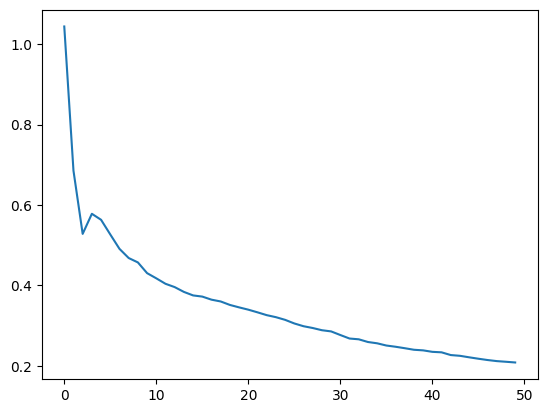

In [4]:
batch_size, data_length = 40, len(data)
input, output = zip(*data)
input, output = np.array(input), np.array(output).reshape(1,-1)
costs, vals = number_detection_model.train(
    np.concatenate((input[0:500], input[-500:])), np.concatenate((output[:,0:500], output[:,-500:]), axis=1),
    # input, output,
    epochs=50, batch_size=batch_size,
    # val=(np.concatenate((input[500:700], input[-700:-501])), np.concatenate((output[:,500:700], output[:,-700:-501]), axis=1)),
    # val=None,
    shuffling=False,
    verbose=1, save_after='num_detect_model_adam')
plt.plot(costs)
plt.show()

# Evaluate on a sample batch of data

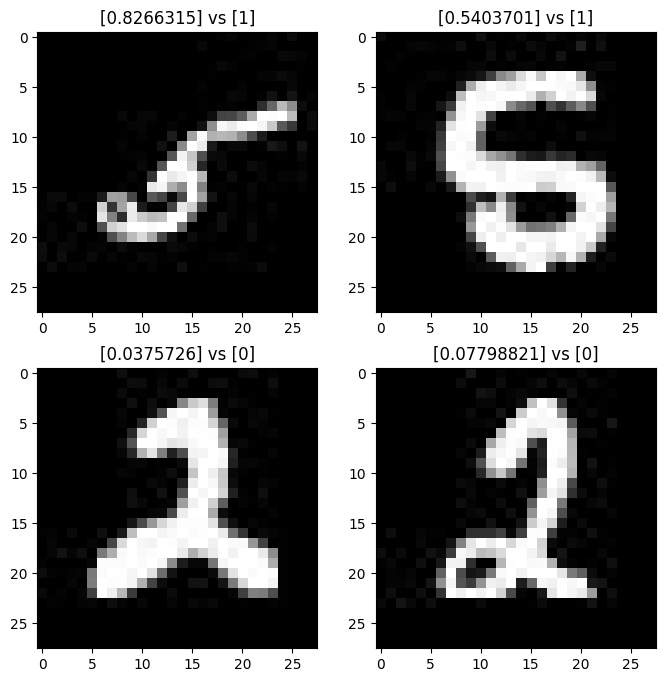

In [5]:
items = list(range(data_length))
np.random.shuffle(items)
items = items[0:4]

X, gt = input[items,:,:,:], output[:,items]
Y = number_detection_model.predict(X)


# Plot predictions vs ground truth[label 0 for 2s and 1 for 5s]
no = 0
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for i in range(2):
    for j in range(2):
        ax[i, j].imshow(X[no].reshape(28, 28), cmap="gray")
        ax[i, j].set_title(f"{Y[:, no]} vs {gt[:, no]}")
        no += 1
        
plt.show()